<a href="https://colab.research.google.com/github/shilpaaah/Machine-Learning/blob/main/MultipleRegression2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Multiple Linear:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
df=pd.read_csv('/content/multiple_linear_regression_dataset.csv')
df

,age,experience,income
0,25,1,30450
1,30,3,35670
2,47,2,31580
3,32,5,40130
4,43,10,47830
5,51,7,41630
6,28,5,41340
7,33,4,37650
8,37,5,40250
9,39,8,45150


In [ ]:
df.head()

,age,experience,income
0,25,1,30450
1,30,3,35670
2,47,2,31580
3,32,5,40130
4,43,10,47830


In [ ]:
df.tail()

,age,experience,income
15,41,6,38900
16,58,17,63600
17,23,1,30870
18,44,9,44190
19,37,10,48700


In [ ]:
df.dtypes

age           int64
experience    int64
income        int64
dtype: object

In [ ]:
df.isna().sum()

age           0
experience    0
income        0
dtype: int64

In [ ]:
x=df.iloc[:,:-1]
x

,age,experience
0,25,1
1,30,3
2,47,2
3,32,5
4,43,10
5,51,7
6,28,5
7,33,4
8,37,5
9,39,8


In [ ]:
y=df.iloc[:,-1]
y

0     30450
1     35670
2     31580
3     40130
4     47830
5     41630
6     41340
7     37650
8     40250
9     45150
10    27840
11    46110
12    36720
13    34800
14    51300
15    38900
16    63600
17    30870
18    44190
19    48700
Name: income, dtype: int64

<Axes: xlabel='age', ylabel='income'>

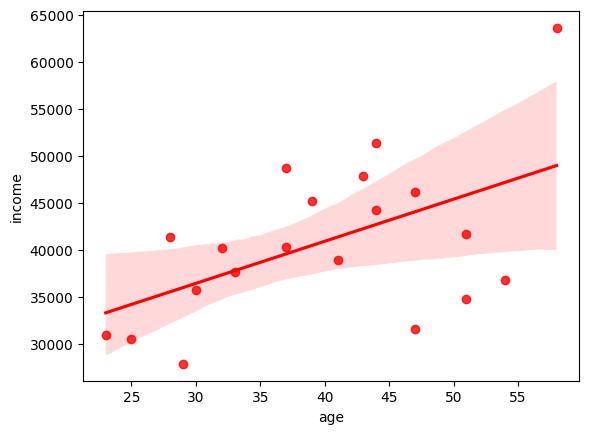

In [ ]:
# Regplot
import seaborn as sns
sns.regplot(x=df['age'],y=y,color='r')

<Axes: xlabel='experience', ylabel='income'>

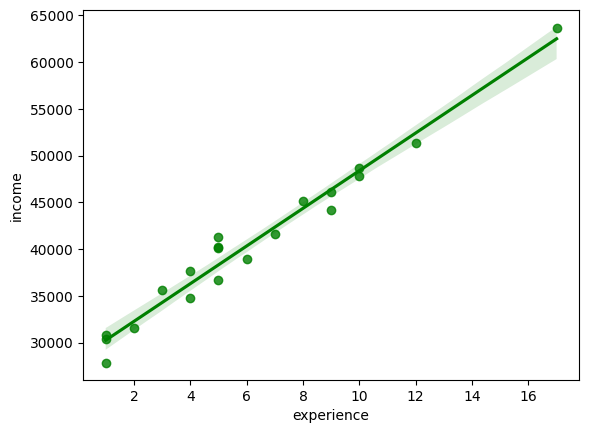

In [ ]:
sns.regplot(x=df['experience'],y=y,color='g')

In [ ]:
# Training and Testing:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=42)
x_train

,age,experience
11,47,9
3,32,5
18,44,9
16,58,17
13,51,4
2,47,2
9,39,8
19,37,10
4,43,10
12,54,5


In [ ]:
# Modelcreation
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(x_train,y_train)
y_pred=model.predict(x_test)
y_pred

array([30822.32314416, 31019.01707419, 40089.99927433, 34667.07934725,
       38315.14162031, 41274.77513825])

In [ ]:
print(model.predict([[40,5]]))

[38020.10072526]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [ ]:
# slope:
print('slope is')
list(zip(x,model.coef_))

slope is


[('age', -98.3469650174363), ('experience', 2168.2455140908205)]

In [ ]:
# Constant:
print('constant is:',model.intercept_)

constant is: 31112.7517555032


In [ ]:
# DF
df1=pd.DataFrame({'Actual_value':y_test,'Predicted_value':y_pred,'Diff':y_test-y_pred})
df1

,Actual_value,Predicted_value,Diff
0,30450,30822.323144,-372.323144
17,30870,31019.017074,-149.017074
15,38900,40089.999274,-1189.999274
1,35670,34667.079347,1002.920653
8,40250,38315.141620,1934.858380
5,41630,41274.775138,355.224862


In [ ]:
# Evaluation:
from sklearn.metrics import mean_absolute_error,mean_absolute_percentage_error,mean_squared_error,r2_score
print('MAE=',mean_absolute_error(y_test,y_pred))
print('MAPE=',mean_absolute_percentage_error(y_test,y_pred))
print('MSE=',mean_squared_error(y_test,y_pred))
print('RMSE=',np.sqrt(mean_squared_error(y_test,y_pred)))
print('r2_score=',r2_score(y_test,y_pred))

MAE= 834.057231144985
MAPE= 0.02206106865345334
MSE= 1075440.0620919282
RMSE= 1037.0342627377015
r2_score= 0.9438292972477471
